# **Laboratorio #1: Image demosaicking**

Demosaicing (o de-mosaicing, demosaicking), también conocido como reconstrucción de color, es un algoritmo de procesamiento de imágenes digitales que se utiliza para reconstruir una imagen a todo color a partir de muestras de color incompletas generadas por un sensor de imagen superpuesto con una matriz de filtros de color (CFA), como un filtro Bayer. También se conoce como interpolación CFA o debayering.

La mayoría de las cámaras digitales modernas adquieren imágenes utilizando un único sensor de imagen superpuesto con un CFA, por lo que la demostración es parte del proceso de procesamiento necesario para representar estas imágenes en un formato visible.

Muchas cámaras digitales modernas pueden guardar imágenes en formato RAW (sin formato), lo que permite al usuario realizar una demostración mediante software, en lugar de utilizar el firmware integrado de la cámara.

# Objetivo:
El objetivo de un algoritmo de demosaicking es reconstruir una imagen a todo color (es decir, un conjunto completo de tripletas de color) a partir de los canales de color espacialmente submuestreados emitidos por el CFA. El algoritmo debe tener las siguientes características:



*   Evitar la introducción de artefactos de color falso, como alias cromáticos, cremalleras (cambios bruscos y antinaturales de intensidad en varios píxeles vecinos) y franjas moradas
*   Máxima preservación de la resolución de la imagen
*   Baja complejidad computacional para un procesamiento rápido o una implementación eficiente del hardware en la cámara
*   Facilidad de análisis para una reducción precisa del ruido

![Demosaicking](../resources/images/demosaicking/demosaick.png)

# Imágenes RAW

Existen diferentes formatos de imágenes tipo .RAW:

![RAW Image Formats](../resources/images/demosaicking/RAW_formats.png)




# Montamos la imagen


Vamos a usar una libreria especial para leer imágenes RAW


In [3]:
!pip install rawpy
!pip install scipy
!pip install matplotlib

  Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.6 MB)


Importemos los paquetes necesarios para realizar el procesamiento

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import rawpy
from scipy.ndimage import filters

Leamos y mostremos una de las imágenes RAW disponibles en nuestra carpeta

Leyendo imagen .RAW ...
Tamaño de la imagen: (2622, 3948)


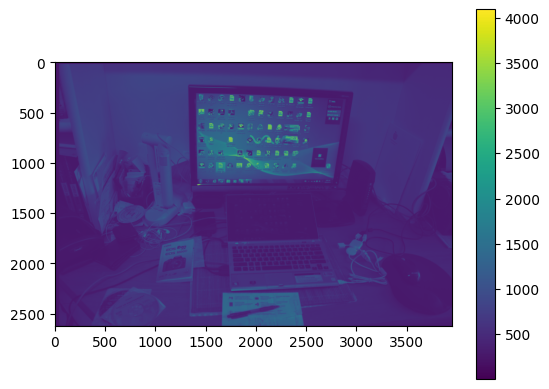

In [5]:
# Load RAW file
with rawpy.imread('../resources/images/demosaicking/scene_raw.CR2') as raw:
    print('Leyendo imagen .RAW ...')
    image = raw.raw_image.copy()

print(f'Tamaño de la imagen: {image.shape}')
plt.imshow(image)
plt.colorbar()
plt.show()

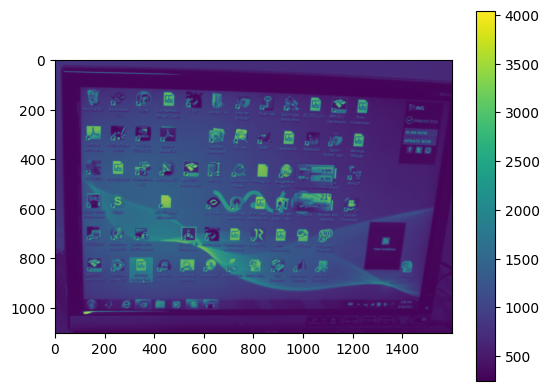

In [6]:
# Enfocandonos en una región particular
plt.imshow(image[200:1300, 1300:2900])
plt.colorbar()
plt.show()

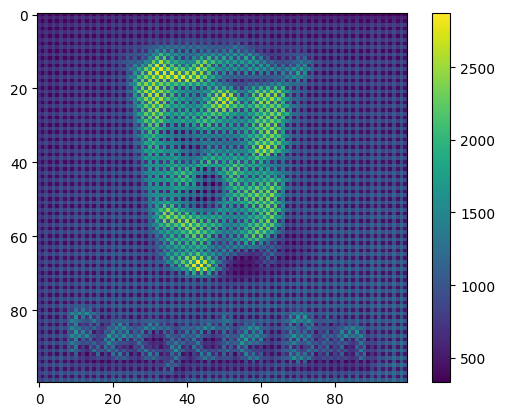

In [7]:
# Hagamos Zoom para ver el patrón Bayer
plt.imshow(image[310:410, 1405:1505])
plt.colorbar()
plt.show()

# **Let's do Demosaicking**

Comenzaremos separando el canal único en tres canales de colores diferentes: rojo, verde y azul (RGB).

In [8]:
RED = 0
GREEN = 1
BLUE = 2
def get_cfa_channel(i, j):
    # CR2 CFA Pattern: [Red   , Green] <-- even rows: 0, 2, 4, ...
    #                  [Green , Blue]  <-- odd  rows: 1, 3, 5, ...
    if i%2 == 0:
      if j%2 == 0:
        return RED
      else:
        return GREEN
    else:
      if j%2 == 0:
        return GREEN
      else:
        return BLUE

In [9]:
get_cfa_channel(1,1)

2

In [10]:
def get_cfa_mask(shape):
    mask = np.zeros(shape)
    for i in range(shape[0]):
      for j in range(shape[1]):
        mask[i,j] = get_cfa_channel(i,j)

    return mask

In [11]:
cfa_mask = get_cfa_mask(image.shape)

In [12]:
cfa_mask.shape

(2622, 3948)

In [13]:
cfa_mask.dtype

dtype('float64')

In [14]:
print(cfa_mask)

[[0. 1. 0. ... 1. 0. 1.]
 [1. 2. 1. ... 2. 1. 2.]
 [0. 1. 0. ... 1. 0. 1.]
 ...
 [1. 2. 1. ... 2. 1. 2.]
 [0. 1. 0. ... 1. 0. 1.]
 [1. 2. 1. ... 2. 1. 2.]]


Comenzando proceso de Demosaicking:
Extrayendo filtros respecto a su posición...
Separando los diferentes canales de color...


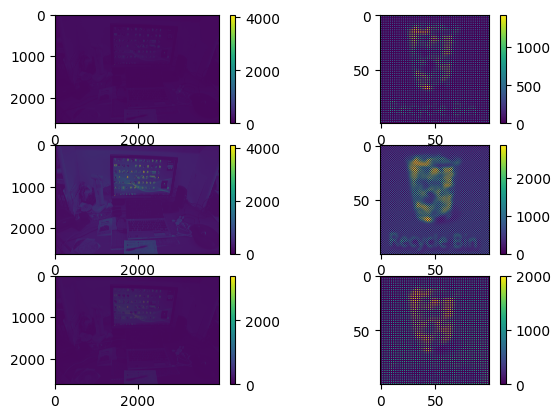

In [15]:
print('Comenzando proceso de Demosaicking:')
print('Extrayendo filtros respecto a su posición...')
r_mask = (cfa_mask == RED)
g_mask = (cfa_mask == GREEN)
b_mask = (cfa_mask == BLUE)

print('Separando los diferentes canales de color...')
r = image * r_mask
g = image * g_mask
b = image * b_mask

plt.subplot(3,2,1)
plt.imshow(r)
plt.colorbar()
plt.subplot(3,2,2)
plt.imshow(r[310:410, 1405:1505])
plt.colorbar()
#plt.show()

plt.subplot(3,2,3)
plt.imshow(g)
plt.colorbar()
plt.subplot(3,2,4)
plt.imshow(g[310:410, 1405:1505])
plt.colorbar()
#plt.show()

plt.subplot(3,2,5)
plt.imshow(b)
plt.colorbar()
plt.subplot(3,2,6)
plt.imshow(b[310:410, 1405:1505])
plt.colorbar()
#plt.show()

# Llenando huecos

Completemos los valores faltantes usando interpolación lineal. Este es un enfoque muy básico.

![Bilinear interpolation](../resources/images/demosaicking/Bilinear_interpolation.png)

Ejecutando interpolación lineal utilizando "convolución"


/tmp/ipykernel_9675/4172242070.py:14: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  r = filters.convolve(r, RB_KERNEL)
/tmp/ipykernel_9675/4172242070.py:15: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  g = filters.convolve(g, G_KERNEL)
/tmp/ipykernel_9675/4172242070.py:16: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  b = filters.convolve(b, RB_KERNEL)


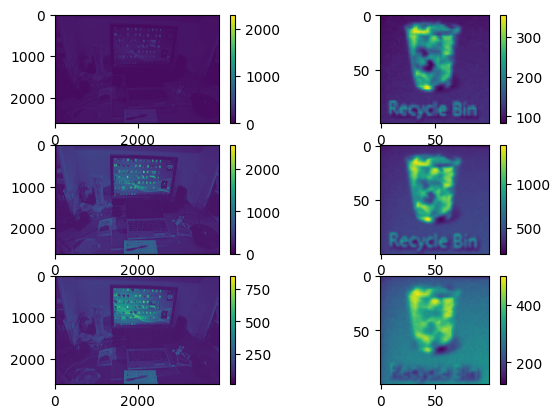

In [16]:
#Filtro lineal para el canal verde
G_KERNEL = np.asarray(
    ((0.0, 1.0, 0.0),
     (1.0, 4.0, 1.0),
     (0.0, 1.0, 0.0))) / 8

#Filtro lineal para los canales azul y rojo (Note la diferencia)
RB_KERNEL = np.asarray(
    ((1.0, 2.0, 1.0),
     (2.0, 4.0, 2.0),
     (1.0, 2.0, 1.0))) / 16

print('Ejecutando interpolación lineal utilizando "convolución"')
r = filters.convolve(r, RB_KERNEL)
g = filters.convolve(g, G_KERNEL)
b = filters.convolve(b, RB_KERNEL)

plt.subplot(3,2,1)
plt.imshow(r)
plt.colorbar()
plt.subplot(3,2,2)
plt.imshow(r[310:410, 1405:1505])
plt.colorbar()
#plt.show()

plt.subplot(3,2,3)
plt.imshow(g)
plt.colorbar()
plt.subplot(3,2,4)
plt.imshow(g[310:410, 1405:1505])
plt.colorbar()
#plt.show()

plt.subplot(3,2,5)
plt.imshow(b)
plt.colorbar()
plt.subplot(3,2,6)
plt.imshow(b[310:410, 1405:1505])
plt.colorbar()
#plt.show()

Agrupemos estos tres canales en una sola imagen.


Agrupando canales para generar imagen RGB ...


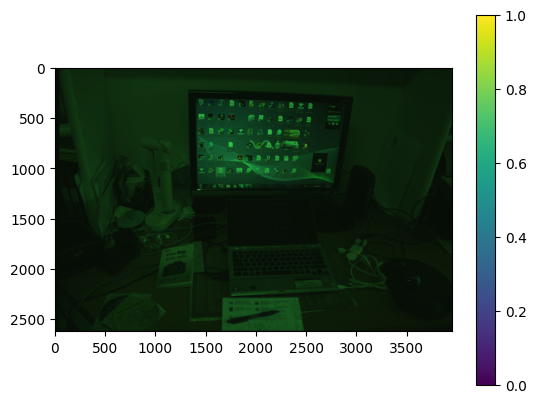

In [17]:
print('Agrupando canales para generar imagen RGB ...')
rgb = np.dstack((r, g, b))
plt.imshow(rgb / rgb.max()) # Normalización
plt.colorbar()
plt.show()

# **Correcciones de color**
La imagen todavía no se ve como esperábamos. Esto se debe a que nos faltan dos pasos cruciales: la resta del nivel de negro y el balanceo de blancos.

Ajustando el nivel de negro ...
Balanceando blancos ...


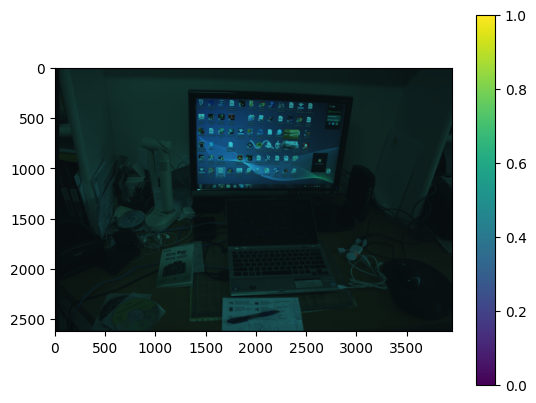

In [18]:
print('Ajustando el nivel de negro ...')
rgb -= np.array((r.min(), g.min(), b.min()))

print('Balanceando blancos ...')
rgb = rgb / np.array((r.max() - r.min(), g.max() - g.min(), b.max() - b.min()))

plt.imshow(rgb)
plt.colorbar()
plt.show()

Nuevamente, este es un enfoque muy básico, ya que no utilizamos ninguna de las estadísticas del fabricante de la cámara ni la sensibilidad configurada con la que se capturó la imagen.

Terminaremos con una corrección gamma (pronto la veremos) para enriquecer los colores.

Aplicando corrección Gamma...


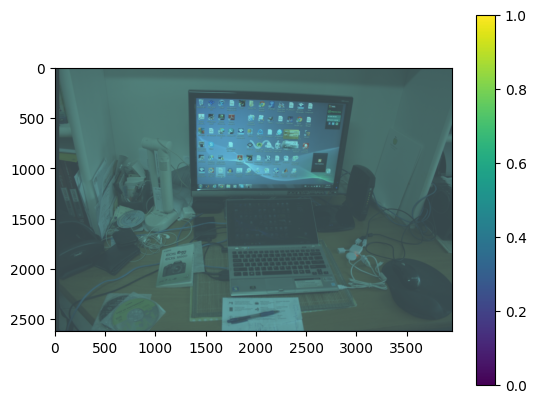

In [19]:
GAMMA = 1 / 2.3

print('Aplicando corrección Gamma...')
rgb = rgb ** GAMMA

plt.imshow(rgb)
plt.colorbar()
plt.show()

In [20]:
import PIL

In [21]:
rgb = PIL.Image.fromarray(rgb.astype(np.uint8))
rgb.save('image_save.jpg')

Carguemos la imagen .RAW nuevamente y ejecutemos un método avanzado (por defecto en el paquete `rawpy`).
¿Puedes notar la diferencia?

Reading image raw data...


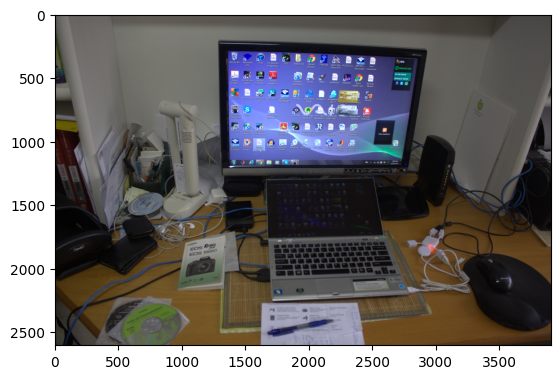

In [23]:
# Comparando contra la imagen original
with rawpy.imread('../resources/images/demosaicking/scene_raw.CR2') as raw:
    print('Reading image raw data...')
    rgb2 = raw.postprocess(use_camera_wb=True)

plt.imshow(rgb2)

In [24]:
print(rgb2.dtype)

uint8


Exportemos la imagen para poder comparar en el futuro

In [25]:
PIL.Image.fromarray(rgb2).save('imagenRGB_original.jpg')

# **Taller**

1. Realizar el proceso de demosaicking a por lo menos 2 imágenes RAW:

*   Por medio de interpolación lineal.
*   Por medio de interpolación cúbica.
*   Algún otro método avanzado (investigar!)

2. Inspeccionar visualmente la calidad espacial de ambas imágenes y describir sus observaciones.

3. Medir el error cuadrático medio (RMSE) y el error absoluto medio (MAE) entre las imágenes RGB de referencia y las estimadas con demosaicking.

4. Generar el mapa de diferencias de píxeles para visualizar dónde se cometen los errores

In [ ]:
def calcular_errores(img_est, img_ref):
    ''' Calcular el error cuadrático medio (RMSE) y el error absoluto medio (MAE)
    entre las imágenes RGB de referencia y las estimadas '''
    return RMSE, MAE

In [ ]:
## Paso a paso

# 1. Carga la imagen .RAW

# 2. Carga la imagen .JPG Original

# 3. Calcula la imagen "demosaicked" usando los 3 métodos

# 4. Calcula los errores e imprimelos

